## Programming Exercise 1: Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 2 Linear regression with one variable

In [22]:
datafile = 'data/ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)
y[:,0]

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [23]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

#### 2.1 Plotting the Data

Text(0.5, 0, 'Population of City in 10,000s')

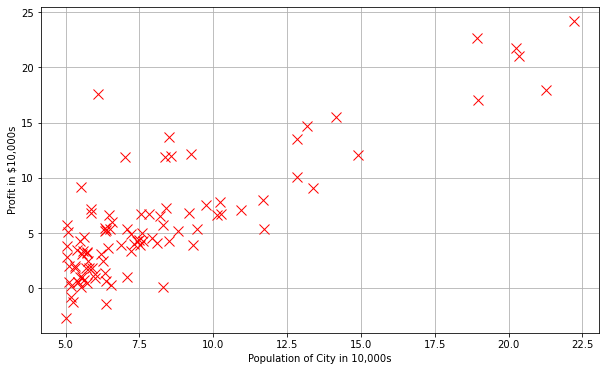

In [21]:
#Plot the data to see what it looks like
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

#### 2.2 Gradient Descent

In [26]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

def computeCost(mytheta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    m = y.size  # count of training exmaples
    # np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)) is equal to np.sum(np.square(h(mytheta,X)-y))
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

#Test that running computeCost with 0's as theta returns 32.07:

initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
print(computeCost(initial_theta,X,y))

32.072733877455676


In [55]:
h(initial_theta, X).shape

(97, 1)

In [4]:
iterations = 1500
alpha = 0.01

In [41]:
X[:,1].shape

(97,)

In [ ]:
a = X[:,1].reshape(m,1)
a

In [44]:
X[:,1]

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [128]:
#Actual gradient descent minimizing routine
def descendGradient(X, y, theta_start = np.zeros(2), iterations=1500, alpha=0.01):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    m = y.size  # count of training exmaples
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for _ in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        # Buggy line
        thetahistory.append(list(tmptheta))
        # Fixed line
        #thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            #print(((h(theta,X) - y)*np.array(X[:,j])).shape)
            #tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
            # (h(theta,X) - y) * np.array(X[:,j]).reshape(m,1)
            tmptheta[j] = theta[j] - (alpha / m) * np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
            print(f"theta[{j}]: {tmptheta[j]}")
        theta = tmptheta
    return theta, thetahistory, jvec

In [111]:
a = np.zeros(2).reshape(2, 1)
a.flatten()

array([0., 0.])

In [110]:
np.zeros(2)

array([0., 0.])

In [47]:
X.shape

(97, 2)

In [48]:
X[:,1].shape

(97,)

In [49]:
X[:,1].reshape(97,1).shape

(97, 1)

In [50]:
X[:,1].T.shape

(97,)

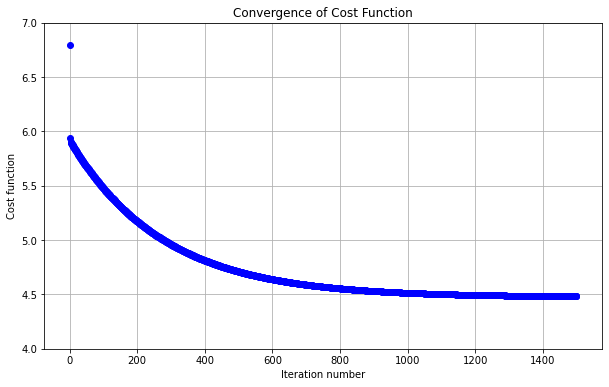

In [125]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X, y, initial_theta)

#Plot the convergence of the cost function
def plotConvergence(jvec, iterations=1500):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(jvec)
dummy = plt.ylim([4,7])

In [106]:
def descend_gradient(X, y, theta_start = np.zeros(2), iterations=1500, alpha=0.01):
    m = y.size  # count of training exmaples
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    theta = theta_start
    for _ in range(iterations):
        jvec.append(computeCost(theta,X,y))
        tmp_theta = theta.reshape(2, 1)
        thetahistory.append(list(tmp_theta))
        jvec.append(computeCost(theta,X,y))
        '''
        print(f"h(tmp_theta, X).shape: {h(tmp_theta, X).shape}")
        print(f"X.T.shape: {X.T.shape}")
        print(f"X.T.dot((h(tmp_theta, X).reshape(m, 1) - y)).shape: {X.T.dot((h(tmp_theta, X).reshape(m, 1) - y)).shape}")
        print(f"tmp_theta.shape: {tmp_theta.shape}")
        print(f"y.shape: {y.shape}")
        print(f"(h(theta, X) - y).shape: {(h(theta, X).reshape(m, 1) - y).shape}")
        print(f"(h(theta, X).reshape(m, 1) - y) * X: {np.sum((h(theta, X).reshape(m, 1) - y) * X).shape}")
        print(np.sum((alpha / m) * (h(theta, X).reshape(m, 1) - y) * X, axis=0))
        '''
        tmp_theta = tmp_theta - (alpha / m) * X.T.dot((h(tmp_theta, X).reshape(m, 1) - y))
        thetahistory.append(list(tmp_theta))
        theta = tmp_theta
    return theta, thetahistory, jvec

In [107]:
initial_theta = np.zeros((X.shape[1],1))
theta_1, thetahistory_1, jvec_1 = descendGradient(X, y, initial_theta)

theta_2, thetahistory_2, jvec_2 = descend_gradient(X, y)

In [117]:
print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"h(theta, X): {h(theta, X).shape}")
print(f"np.array(X[:,0]): {np.array(X[:,0]).shape}")

X: (97, 2)
y: (97, 1)
h(theta, X): (97, 1)
np.array(X[:,0]): (97,)


In [135]:
theta = np.zeros((X.shape[1],1))
alpha = 0.01
m = y.size
new_theta = theta - (alpha / m) * X.T.dot((h(theta, X).reshape(m, 1) - y))
new_theta

array([[0.05839135],
       [0.6532885 ]])

In [130]:
theta = np.zeros((X.shape[1],1))
alpha = 0.01
print(f"theta[0]: {theta[0]}")
print(f"theta[1]: {theta[1]}")
m = y.size
print(m)
print(theta[0] - (alpha / m) * np.sum((h(theta, X) - y) * np.array(X[:,0]).reshape(m,1)))
print(theta[1] - (alpha / m) * np.sum((h(theta, X) - y) * np.array(X[:,1]).reshape(m,1)))

theta[0]: [0.]
theta[1]: [0.]
97
[0.05839135]
[0.6532885]


In [129]:
initial_theta = np.zeros((X.shape[1],1))
theta_1, thetahistory_1, jvec_1 = descendGradient(X, y, initial_theta, iterations=1)

theta[0]: [0.05839135]
theta[1]: [0.64852388]


In [127]:
print(thetahistory_1[1])
print(thetahistory_2[1])

[array([-3.63606348]), array([1.16698916])]
[array([0.05839135]), array([0.6532885])]


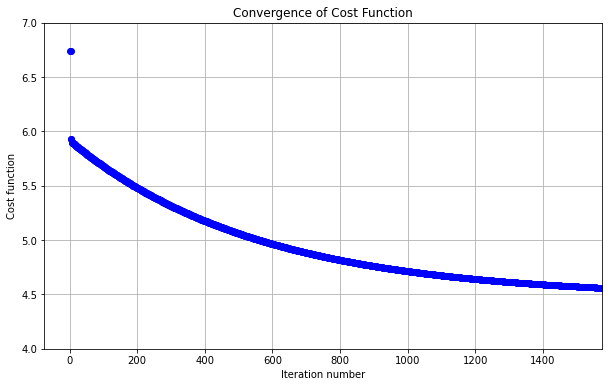

In [136]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descend_gradient(X, y, initial_theta)

#Plot the convergence of the cost function
def plotConvergence(jvec, iterations=1500):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(jvec)
dummy = plt.ylim([4,7])

In [137]:
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descend_gradient(X, y, initial_theta)
theta

array([[-3.63029144],
       [ 1.16636235]])

In [139]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

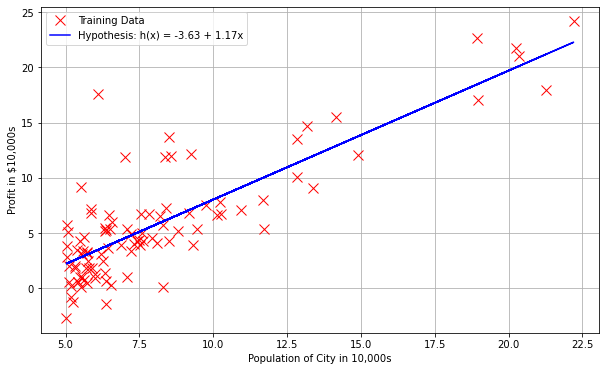

In [140]:
#Plot the line on top of the data to ensure it looks correct
def myfit(xval):
    return xval.dot(theta)
    #return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

#### 2.4 Visualizing _J($\theta$)_

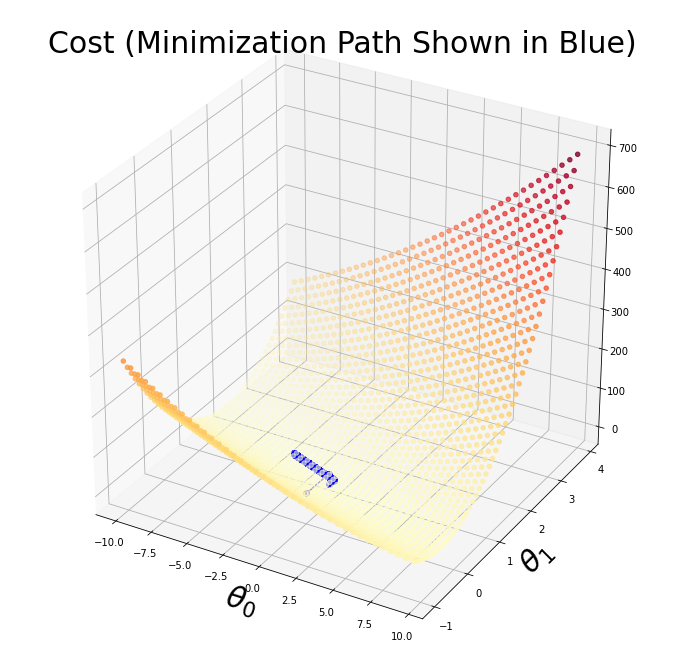

In [141]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()

### 3. Linear Regression with multiple variables

In [146]:
datafile = 'data/ex1data2.txt'
#Read into the data file
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
#X = np.array(cols[:-1]).T
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [ ]:
X

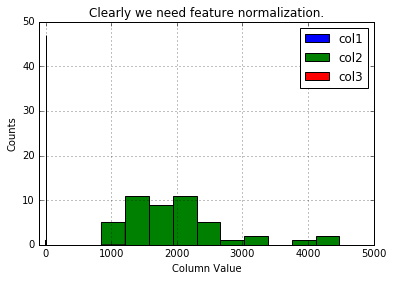

In [11]:
#Quick visualize data
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [165]:
X

array([[2.104e+03, 3.000e+00],
       [1.600e+03, 3.000e+00],
       [2.400e+03, 3.000e+00],
       [1.416e+03, 2.000e+00],
       [3.000e+03, 4.000e+00],
       [1.985e+03, 4.000e+00],
       [1.534e+03, 3.000e+00],
       [1.427e+03, 3.000e+00],
       [1.380e+03, 3.000e+00],
       [1.494e+03, 3.000e+00],
       [1.940e+03, 4.000e+00],
       [2.000e+03, 3.000e+00],
       [1.890e+03, 3.000e+00],
       [4.478e+03, 5.000e+00],
       [1.268e+03, 3.000e+00],
       [2.300e+03, 4.000e+00],
       [1.320e+03, 2.000e+00],
       [1.236e+03, 3.000e+00],
       [2.609e+03, 4.000e+00],
       [3.031e+03, 4.000e+00],
       [1.767e+03, 3.000e+00],
       [1.888e+03, 2.000e+00],
       [1.604e+03, 3.000e+00],
       [1.962e+03, 4.000e+00],
       [3.890e+03, 3.000e+00],
       [1.100e+03, 3.000e+00],
       [1.458e+03, 3.000e+00],
       [2.526e+03, 3.000e+00],
       [2.200e+03, 3.000e+00],
       [2.637e+03, 3.000e+00],
       [1.839e+03, 2.000e+00],
       [1.000e+03, 1.000e+00],
       [

In [12]:
#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in xrange(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column
    if not icol: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

In [152]:
np.mean(X, axis=0)

array([1.00000000e+00, 2.00068085e+03, 3.17021277e+00])

In [153]:
np.std(X, axis=0)

array([0.00000000e+00, 7.86202619e+02, 7.52842809e-01])

In [156]:
datafile = 'data/ex1data2.txt'
#Read into the data file
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
#X = np.array(cols[:-1]).T
Xnorm = (X - np.mean(X, axis=0))/np.std(X, axis=0)
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
Xnorm = np.insert(Xnorm,0,1,axis=1)
Xnorm

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

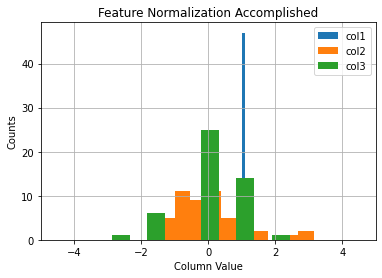

In [158]:
#Quick visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [162]:
def descend_gradient(X, y, theta_start, iterations=1500, alpha=0.01):
    m = y.size  # count of training exmaples
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    theta = theta_start
    for _ in range(iterations):
        jvec.append(computeCost(theta,X,y))
        #tmp_theta = theta.reshape(2, 1)
        tmp_theta = theta
        thetahistory.append(list(tmp_theta))
        jvec.append(computeCost(theta,X,y))
        tmp_theta = tmp_theta - (alpha / m) * X.T.dot((h(tmp_theta, X).reshape(m, 1) - y))
        thetahistory.append(list(tmp_theta))
        theta = tmp_theta
    return theta, thetahistory, jvec

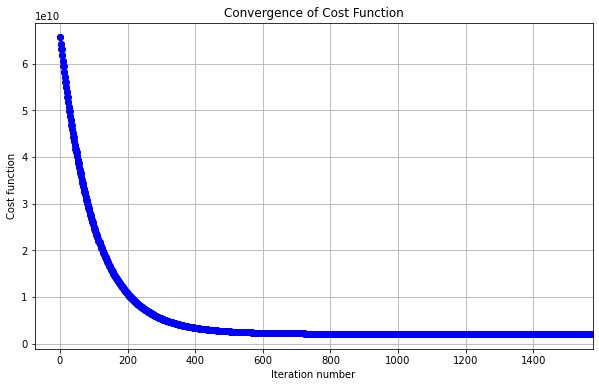

In [164]:
#Run gradient descent with multiple variables, initial theta still set to zeros
#(Note! This doesn't work unless we feature normalize! "overflow encountered in multiply")
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descend_gradient(Xnorm, y, initial_theta)

#Plot convergence of cost function:
plotConvergence(jvec)

In [175]:
#print "Final result theta parameters: \n",theta
print("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([[1650.,3.]])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
#ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in xrange(len(ytest))]
ytestscaled = (ytest - np.mean(X, axis=0))/np.std(X, axis=0)
#ytestscaled.insert(0,1)
ytestscaled = np.insert(ytestscaled,0,1,axis=1)
print(f"{float(h(theta,ytestscaled))}")

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
293098.4666757651


In [176]:
from numpy.linalg import inv
#Implementation of normal equation to find analytic solution to linear regression
def normEqtn(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [179]:
print("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
X_test = np.insert(X,0,1,axis=1)
print(f"{float(h(normEqtn(X_test,y),[1,1650.,3]))}")

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
293081.4643348959
